In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with 20-dimensional data

# Example: If you don't have the data, you can simulate it like this:
# df = pd.DataFrame(np.random.rand(100, 20), columns=[f'feature_{i}' for i in range(20)])

df = pd.read_csv('main_synth_data.csv')   # Load your data here



In [74]:
# get last 40 columns names of the data
cols = df.columns[-41:]
# drop the columns
df = df.drop(cols, axis=1)

df

,id,daysOld,diagnosisDays,hivA,hivS,aidsA,aidsS,fever,fatigue,diarrhea,...,otherIllness,KARNOFSKY,KARNOFSKYSTAGE,Nursing,Dental,tbScreen,tbDiagnosis,tbPrevent,tbActive,tbCompliance
0,282853290,55340,633,1,1,1,0,0,1,1,...,0,49,2,0,1,1,1,0,0,1
1,320574929,4511,3923,0,0,1,0,0,1,0,...,0,67,2,1,1,1,1,0,0,1
2,180769611,2386,36,1,0,0,0,1,1,0,...,0,40,2,1,1,1,1,1,0,0
3,242192464,74582,36,1,0,1,0,0,0,1,...,0,40,1,0,1,1,1,0,0,1
4,330756108,3371,2550,0,0,0,0,1,0,0,...,0,96,2,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,726756413,8855,36,0,0,0,0,0,0,0,...,0,91,1,0,1,1,1,0,0,0
9996,220057011,5271,36,0,1,0,0,1,0,0,...,0,42,1,1,1,1,1,0,0,1
9997,359235337,9419,280,0,0,0,0,0,1,0,...,0,61,1,1,1,1,0,0,0,0
9998,813251942,78953,36,1,0,1,0,0,1,0,...,0,100,2,0,1,1,1,1,0,1


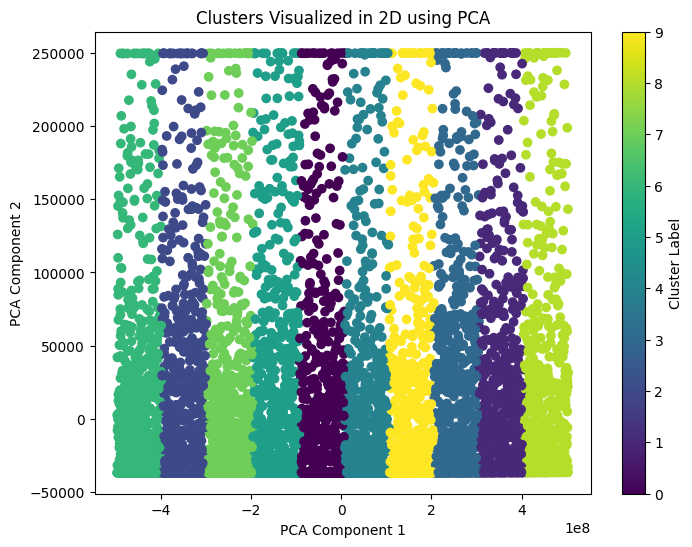

,id,cluster
0,282853290,7
1,320574929,5
2,180769611,2
3,242192464,7
4,330756108,5
...,...,...
9995,726756413,3
9996,220057011,7
9997,359235337,5
9998,813251942,1


In [76]:

# Step 1: Clustering with KMeans
import pickle


kmeans = KMeans(n_clusters=10, random_state=213213)  # Choose the number of clusters
df['cluster'] = kmeans.fit_predict(df)

# Step 2: Dimensionality reduction using PCA
pca = PCA(n_components=10)
# Drop cluster column for PCA
df_pca = pca.fit_transform(df.drop('cluster', axis=1))

# Step 3: Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters Visualized in 2D using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

pickle.dump(kmeans, open("clustering.pkl", "wb"))

# store the ID and cluster number in a new dataframe
df_cluster = df[['id', 'cluster']]

df_cluster.to_csv('main_synth_data_cluster.csv', index=False)

df_cluster


In [17]:
treatment_samples = pd.read_csv('treatments_sample.csv')


In [31]:
# drop ID column
# treatment_samples = treatment_samples.drop('id', axis=1)
treatment_samples

# each row contains 5 columns, Treatment1, Treatment2, Treatment3, Treatment4, and Treatment5
# each cell contains one treatment.
# for each row instead create a one hot encoded vector with 1s and 0s, where 1 indicates the presence of a treatment in one of the columns
# The vector should represent all treatments across all columns across all rows

unique_treatments = treatment_samples.stack().unique()
len(unique_treatments)

# create a new DataFrame with one hot encoded vectors
treatment_samples_onehot = pd.DataFrame(columns=unique_treatments)

for i, row in treatment_samples.iterrows():
    onehot = pd.Series(0, index=unique_treatments)
    onehot[row] = 1
    treatment_samples_onehot = treatment_samples_onehot._append(onehot, ignore_index=True)

treatment_samples_onehot



,Optimize ART regimen,Start PCP prophylaxis: TMP-SMX,Treat KS: Liposomal Doxorubicin,Continue TB preventive therapy: INH+Pyridoxine,Manage fatigue: Evaluate for anemia,Initiate ART: ABC+3TC+DTG,Start TB preventive therapy: INH+Pyridoxine,Counsel on adherence and lifestyle modifications,-1,Optimize ART: Consider second-line regimen,...,Offer vaccinations: Hepatitis B and HPV,Manage fatigue: Evaluate for sleep disorders,Offer vaccinations: Influenza and Pneumococcal,Manage diarrhea: Antimotility agents,Hydration therapy,Offer vaccinations: Tdap and Hepatitis B,Counsel on adherence and nutrition,Offer vaccinations: Influenza and HPV,Offer vaccinations: Hepatitis B and Pneumococcal,Manage diarrhea: Loperamide and rehydration
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
main_data = pd.read_csv('test.csv')

columns_drop = ['Provide Adherence Support for TB Treatment','Educate on HIV Management', 'Provide Adherence Support', 'Treat Opportunistic Infections', 
'Initiate ART', 'Optimize ART',
       'Start TB Preventive Therapy', 'Start Active TB Treatment',
       'Symptomatic Treatment', "Treat Kaposi's Sarcoma", 'Treat PCP',
       'Treat Opportunistic Infections', 'Provide Adherence Support',
       'Educate on HIV Management',
       'Provide Adherence Support for TB Treatment'
]



for column in columns_drop:
    if column in main_data.columns:
        main_data = main_data.drop(column, axis=1)


# merge two dfs
main_data = pd.concat([main_data, treatment_samples_onehot], axis=1)

main_data

# print rows with any nan

null_data = main_data[main_data.isnull().any(axis=1)]
null_data

# store the data in a csv file

main_data.to_csv('main_sample_data.csv', index=False)